<center><b>MODEL PREDICTIONS</b><center>

##### <b>IMPORTING THE BASIC LIBRARIES</b>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [18]:
# loading test data
test_data = pd.read_csv('./testing_data.csv')
test_data

,Unnamed: 0,Age,Gender,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,...,EmpJobRole_Research Scientist,EmpJobRole_Sales Executive,EmpJobRole_Sales Representative,EmpJobRole_Senior Developer,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely,PerformanceRating
0,811,35,False,23,4,3,30,3,1,1,...,False,False,False,False,False,False,False,False,True,3
1,1149,26,True,24,3,3,66,1,1,4,...,False,False,False,False,False,False,False,False,True,3
2,662,36,True,17,2,3,33,2,2,2,...,False,True,False,False,False,False,False,False,True,2
3,542,53,True,24,4,2,48,4,3,4,...,False,False,False,False,False,False,False,False,True,2
4,858,34,False,6,4,3,45,2,2,2,...,False,False,False,False,False,False,False,False,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,623,58,True,15,4,1,87,3,4,3,...,False,False,False,False,False,False,False,True,False,2
236,580,30,True,15,2,3,94,2,3,1,...,False,True,False,False,False,False,False,False,True,3
237,147,33,False,13,1,2,53,3,1,4,...,False,False,False,False,False,False,False,False,True,3
238,798,27,True,8,3,4,37,3,3,3,...,False,True,False,False,False,False,False,True,False,3


In [19]:
test_data.head(5)

,Unnamed: 0,Age,Gender,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,...,EmpJobRole_Research Scientist,EmpJobRole_Sales Executive,EmpJobRole_Sales Representative,EmpJobRole_Senior Developer,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely,PerformanceRating
0,811,35,False,23,4,3,30,3,1,1,...,False,False,False,False,False,False,False,False,True,3
1,1149,26,True,24,3,3,66,1,1,4,...,False,False,False,False,False,False,False,False,True,3
2,662,36,True,17,2,3,33,2,2,2,...,False,True,False,False,False,False,False,False,True,2
3,542,53,True,24,4,2,48,4,3,4,...,False,False,False,False,False,False,False,False,True,2
4,858,34,False,6,4,3,45,2,2,2,...,False,False,False,False,False,False,False,False,True,3


##### <b>Method to Make Predictions</b>

In [20]:
def MODEL_PREDICTIONS(model, predict_model_filename):

    # importing the model
    trained_model = joblib.load(model)

    #splitting into x and y
    X= test_data.drop('PerformanceRating', axis= 1)
    y_actual= test_data['PerformanceRating']

    # making predictions
    y_prediction= trained_model.predict(X)

    # comparing the prediction with the actual values
    comparison= pd.DataFrame({'Model_Predictions': y_prediction, 'Actual_Targets': y_actual})

    # saving it in a separate csv file
    comparison.to_csv(predict_model_filename)

    # displaying predictions and comparison with actual y value
    print(f"MODEL PREDICTIONS:\n\n{y_prediction}")
    print("\n\nCOMPARISON WITH THE ACTUAL TARGET VALUES:") 
    
    return comparison

##### <b>Decission Tree Model</b>

In [21]:
# calling the function for prediction
MODEL_PREDICTIONS(model = "decission_tree_base_model.pkl",  predict_model_filename = "predict_decision_tree_base_model.csv")

MODEL PREDICTIONS:

[3 3 2 2 3 3 2 3 3 3 3 2 3 3 3 3 3 3 4 3 3 2 3 3 3 2 4 3 2 3 3 4 3 3 3 3 3
 3 4 3 3 3 3 3 3 4 4 3 3 3 3 2 3 4 3 3 3 3 3 3 3 4 4 3 3 3 2 3 3 4 3 3 3 3
 3 3 3 3 3 3 3 2 3 3 3 2 2 3 3 3 3 2 4 3 3 3 4 3 2 2 3 3 4 3 3 3 2 2 2 3 3
 3 4 3 3 4 3 3 3 3 3 4 2 2 3 3 2 3 3 4 3 3 3 3 3 2 3 3 3 3 3 2 2 2 3 4 3 2
 3 4 3 3 3 3 3 4 2 3 3 3 3 3 3 2 3 3 3 3 3 3 4 2 3 2 3 3 3 3 2 4 3 3 3 3 3
 4 4 3 4 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 2 3 3 3 3 3 3 3 3 3 3 2 2 2 2 3 4 3
 2 4 3 3 3 3 3 3 3 4 3 3 3 2 3 3 3 3]


COMPARISON WITH THE ACTUAL TARGET VALUES:


,Model_Predictions,Actual_Targets
0,3,3
1,3,3
2,2,2
3,2,2
4,3,3
...,...,...
235,2,2
236,3,3
237,3,3
238,3,3


<b>Tunned Decission Tree Model</b>

In [22]:
# calling the function for prediction
MODEL_PREDICTIONS(model = "decission_tree_trained_and_tunned_model.pkl",  predict_model_filename = "predict_tuned_decision_tree_model.csv")

MODEL PREDICTIONS:

[3 2 2 2 3 3 2 3 2 3 3 2 3 3 3 3 3 3 3 3 3 2 3 2 3 4 4 3 2 3 3 4 3 3 3 4 3
 3 4 3 3 3 3 3 3 4 4 3 3 3 3 2 3 4 3 3 3 3 3 3 3 4 4 3 3 3 2 3 3 4 3 3 3 3
 3 3 3 3 2 3 3 2 3 3 3 2 2 3 3 3 3 4 4 3 3 3 3 3 2 2 3 3 4 3 3 3 2 2 2 2 3
 3 4 3 3 4 4 2 3 3 3 4 2 2 3 2 2 3 4 4 3 3 3 4 3 2 3 3 3 4 3 2 2 2 2 3 3 2
 3 4 3 3 3 3 3 4 3 2 3 3 3 2 3 2 3 3 3 3 3 3 4 2 3 2 3 3 3 3 2 3 3 3 3 3 3
 4 3 3 4 3 3 3 3 3 3 3 3 3 3 3 2 3 2 3 2 2 2 3 3 4 3 3 3 3 3 2 2 2 2 3 4 3
 2 4 3 3 4 2 3 3 3 2 3 3 3 2 3 3 3 2]


COMPARISON WITH THE ACTUAL TARGET VALUES:


,Model_Predictions,Actual_Targets
0,3,3
1,2,3
2,2,2
3,2,2
4,3,3
...,...,...
235,2,2
236,3,3
237,3,3
238,3,3


<b>Random Forest Model</b>

In [23]:
# calling the function for prediction
MODEL_PREDICTIONS(model= "random_forest_base_trained_model.pkl",  predict_model_filename= "predict__base_random_forest_model.csv")

MODEL PREDICTIONS:

[3 3 3 2 3 3 2 3 3 3 3 2 3 3 3 3 3 3 3 3 3 2 3 3 3 3 4 3 3 3 3 4 3 3 3 3 3
 3 4 3 3 3 3 3 3 4 4 3 3 3 3 2 3 4 3 3 3 3 3 3 3 4 4 3 3 3 2 3 3 4 3 3 3 3
 3 3 3 3 3 3 3 2 3 3 3 2 3 3 3 3 3 2 4 3 3 3 3 3 2 3 3 3 4 3 3 3 2 2 2 3 3
 3 4 3 3 4 3 3 3 3 3 4 3 2 3 3 2 3 3 4 3 3 3 3 3 2 3 3 3 4 3 2 2 2 3 3 3 2
 3 4 3 3 3 3 3 4 3 2 3 3 3 3 3 3 3 3 3 3 3 3 4 2 3 2 3 3 3 3 2 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 2 3 3 3 3 4 3 3 3 3 3 2 2 2 2 3 4 3
 2 4 3 3 3 2 3 3 3 3 3 3 3 2 3 3 3 2]


COMPARISON WITH THE ACTUAL TARGET VALUES:


,Model_Predictions,Actual_Targets
0,3,3
1,3,3
2,3,2
3,2,2
4,3,3
...,...,...
235,2,2
236,3,3
237,3,3
238,3,3


<b>Tunned Random Forest Model</b>

In [24]:
# calling the function for prediction
MODEL_PREDICTIONS(model= "random_forest_trained_and_tunned_model.pkl",  predict_model_filename= "predict_tuned_random_forest_model.csv")

MODEL PREDICTIONS:

[3 3 3 2 3 3 2 3 3 3 3 2 3 3 3 3 3 3 3 3 3 2 3 3 3 3 4 3 3 3 3 4 3 3 3 4 3
 3 4 3 3 3 3 3 3 4 4 3 3 3 3 2 3 4 3 3 3 3 3 3 3 4 4 3 3 3 2 3 3 4 3 3 3 3
 3 3 3 3 3 3 3 2 3 3 3 2 3 3 3 3 3 2 4 3 3 3 3 3 2 3 3 3 2 3 3 3 2 2 2 3 3
 3 4 3 3 4 3 3 3 3 3 4 3 2 3 3 2 3 3 3 3 3 3 3 3 2 3 3 3 4 3 2 2 2 3 3 3 2
 3 4 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 4 2 3 2 3 3 3 3 2 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 2 3 3 3 3 4 3 3 3 3 3 2 2 2 2 3 4 3
 2 4 3 3 3 2 3 3 3 3 3 3 3 2 3 3 3 2]


COMPARISON WITH THE ACTUAL TARGET VALUES:


,Model_Predictions,Actual_Targets
0,3,3
1,3,3
2,3,2
3,2,2
4,3,3
...,...,...
235,2,2
236,3,3
237,3,3
238,3,3


<b>Support Vecotor Machine</b>

In [25]:
# calling the function for prediction
MODEL_PREDICTIONS(model= "trained_model_base_svm.pkl",  predict_model_filename= "predict_base_svm_model.csv")

MODEL PREDICTIONS:

[4 3 2 2 4 3 2 3 2 3 2 2 3 3 2 2 2 2 4 2 2 3 3 4 3 4 4 3 3 3 3 2 3 3 2 2 3
 3 3 3 3 3 3 3 4 3 2 3 3 3 2 2 2 4 3 3 4 3 2 3 2 2 2 3 2 3 2 3 3 3 3 3 3 3
 3 3 3 2 3 2 4 2 3 2 2 2 3 4 2 3 3 3 2 2 3 4 3 2 4 3 4 3 3 4 2 2 4 2 3 2 2
 2 4 2 2 2 2 4 3 4 4 3 2 2 4 3 2 3 3 3 2 3 3 2 2 4 3 4 3 2 4 2 2 2 4 2 2 2
 3 3 4 2 2 3 2 4 3 3 2 2 2 3 2 4 2 4 3 2 2 2 2 2 2 2 4 2 3 2 2 3 3 3 4 2 2
 2 3 3 3 3 3 4 2 3 4 2 3 2 3 2 4 4 3 3 2 2 2 2 3 3 4 2 3 4 4 2 4 3 2 4 3 2
 3 2 3 2 4 4 3 3 4 3 2 2 2 2 2 3 4 2]


COMPARISON WITH THE ACTUAL TARGET VALUES:


,Model_Predictions,Actual_Targets
0,4,3
1,3,3
2,2,2
3,2,2
4,4,3
...,...,...
235,2,2
236,2,3
237,3,3
238,4,3


<b>Tunned Support Vector Machine</b>

In [26]:
# calling the function for prediction
MODEL_PREDICTIONS(model= "trained_model_tuned_svm.pkl",  predict_model_filename= "predict_model_tuned_svm.csv")

MODEL PREDICTIONS:

[3 3 3 3 4 3 2 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


COMPARISON WITH THE ACTUAL TARGET VALUES:


,Model_Predictions,Actual_Targets
0,3,3
1,3,3
2,3,2
3,3,2
4,4,3
...,...,...
235,3,2
236,3,3
237,3,3
238,3,3


<b>Tunned XGBoost</b>

In [27]:
# importing the model
xgboost_model= joblib.load("xgboost_trained_and_tunned_model.pkl")

#splitting into x and y
X= test_data.drop('PerformanceRating', axis= 1)
y_actual= test_data['PerformanceRating']


# Label Encoding y_actual to have 0, 1, 2 orders of performance rating for easy implementation of xgboost model
from sklearn.preprocessing import LabelEncoder
label_encoder_xgboost = LabelEncoder()
y_actual_xg = label_encoder_xgboost.fit_transform(y_actual)

# making predictions
y_prediction= xgboost_model.predict(X)

# comparing the prediction with the actual values
comparison= pd.DataFrame({'Model_Predictions': y_prediction, 'Actual_Targets': y_actual_xg})

# saving it in a separate csv file
comparison.to_csv("predict_model_tuned_xgboost.csv")

# displaying predictions and comparison with actual y value
print(f"MODEL PREDICTIONS:\n\n{y_prediction}")
print("\n\nCOMPARISON WITH THE ACTUAL TARGET VALUES:") 
comparison

MODEL PREDICTIONS:

[1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 2 1 1 1 1 2 1 1 1 2 1
 1 2 1 1 1 1 1 1 2 2 1 1 1 1 0 1 2 1 1 1 1 1 1 1 2 2 1 1 1 0 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 2 1 1 1 1 1 0 1 1 1 2 1 1 1 0 0 0 1 1
 1 2 1 1 2 1 1 1 1 1 2 0 0 1 1 0 1 1 2 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0
 1 2 1 1 1 1 1 2 1 0 1 1 1 1 1 1 1 1 1 1 1 1 2 0 1 0 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 2 1 1 1 1 1 0 0 0 0 1 2 1
 0 2 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0]


COMPARISON WITH THE ACTUAL TARGET VALUES:


,Model_Predictions,Actual_Targets
0,1,1
1,1,1
2,1,0
3,0,0
4,1,1
...,...,...
235,0,0
236,1,1
237,1,1
238,1,1


<b>Conclusion</b>

<b>Model Comparison Results</b>

In [28]:
# Performance metrics

'''Defining a function to calculate all the required performance metrics
for the given model'''
def metrics_calculator(predictions_file, model_name):

    # loading the predictions file
    predict_model= pd.read_csv(predictions_file)

    # creating a dataframe of evaluation metrics
    result=pd.DataFrame(
            data=[
                accuracy_score(
                    predict_model['Actual_Targets'], 
                    predict_model['Model_Predictions']
                ),
                precision_score(
                    predict_model['Actual_Targets'], 
                    predict_model['Model_Predictions'], 
                    average= 'macro'
                ),
                recall_score(
                    predict_model['Actual_Targets'], 
                    predict_model['Model_Predictions'], 
                    average= 'macro'
                ),
                f1_score(
                    predict_model['Actual_Targets'], 
                    predict_model['Model_Predictions'], 
                    average= 'macro'
                )
            ],
            index=['Accuracy','precision','Recall', 'F1-score'],
            columns= [model_name]
        )
    return result

In [29]:
# calling the function to calculate the metrics and storing it in separate variable for each of the models

base_dt_result= metrics_calculator(predictions_file="predict_decision_tree_base_model.csv", model_name='Base Decision Tree')
tuned_dt_result= metrics_calculator(predictions_file="predict_tuned_decision_tree_model.csv", model_name='Tuned Decision Tree')
base_rf_result= metrics_calculator(predictions_file="predict__base_random_forest_model.csv", model_name='Base Random Forest')
tuned_rf_result= metrics_calculator(predictions_file="predict_tuned_random_forest_model.csv", model_name='Tuned Random Forest')
base_svm_result= metrics_calculator(predictions_file="predict_base_svm_model.csv", model_name='Base SVM')
tuned_svm_result= metrics_calculator(predictions_file="predict_model_tuned_svm.csv", model_name='Tuned SVM')
tuned_xgboost_result= metrics_calculator(predictions_file="predict_model_tuned_xgboost.csv", model_name='Tuned xgboost')

In [30]:
# Displaying the dataframe of performance metrics

report = pd.concat(
            [
                base_dt_result, 
                tuned_dt_result, 
                base_rf_result, 
                tuned_rf_result, 
                base_svm_result, 
                tuned_svm_result, 
                tuned_xgboost_result
            ], 
            axis= 1
        )
report

,Base Decision Tree,Tuned Decision Tree,Base Random Forest,Tuned Random Forest,Base SVM,Tuned SVM,Tuned xgboost
Accuracy,0.908333,0.858333,0.929167,0.920833,0.458333,0.712500,0.933333
precision,0.854664,0.768637,0.926538,0.912870,0.401177,0.420594,0.922979
Recall,0.870305,0.854090,0.855629,0.829988,0.434432,0.343272,0.875092
F1-score,0.862118,0.803229,0.887564,0.865825,0.369163,0.314201,0.897400


- Best **Accuracy** 👉 Tunned XGboost
- Best **Precision** Base Random Forest
- Best **Recall** 👉Tuned XGboost
- Best **F1-score** 👉 Tuned XGboost

In [33]:
best_model=pd.DataFrame(
    [  
        'Tunned XG Boost✅',
        'Base Random Forest', 
        'Tuned Random Forest Tree', 
        'Tuned Decision Tree', 
        'Base Decision Tree', 
        'Tuned SVM', 
        'Base SVM'
    ],
    columns= ['Model (Best from 1 to 7)'],
    index= [1, 2, 3, 4, 5, 6, 7]
)
best_model

,Model (Best from 1 to 7)
1,Tunned XG Boost✅
2,Base Random Forest
3,Tuned Random Forest Tree
4,Tuned Decision Tree
5,Base Decision Tree
6,Tuned SVM
7,Base SVM


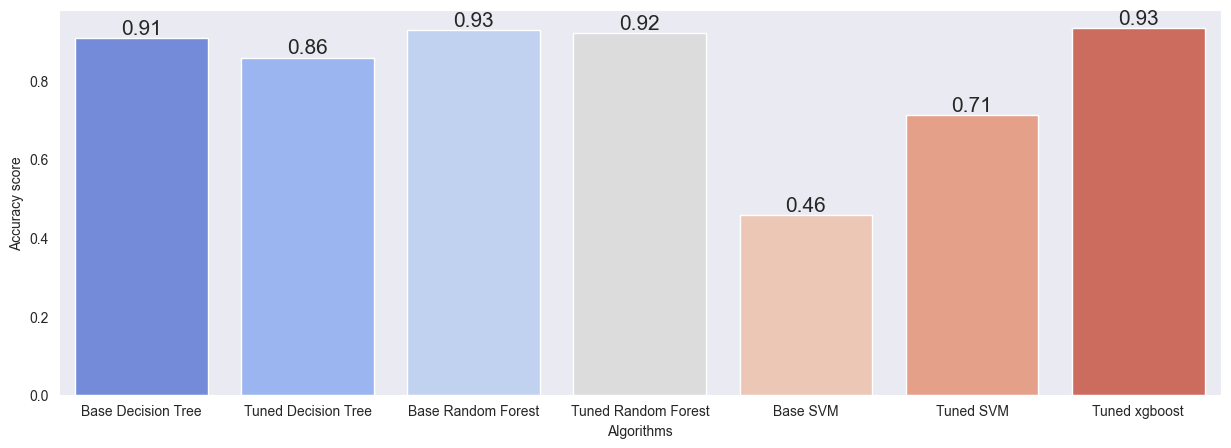

In [34]:
accuracy_scores = [base_dt_result.iloc[0, 0], tuned_dt_result.iloc[0,0], base_rf_result.iloc[0, 0], tuned_rf_result.iloc[0, 0], base_svm_result.iloc[0, 0], tuned_svm_result.iloc[0, 0], tuned_xgboost_result.iloc[0, 0]]
algorithms = ["Base Decision Tree", 'Tuned Decision Tree', 'Base Random Forest', 'Tuned Random Forest', 'Base SVM', 'Tuned SVM', 'Tuned xgboost']

plt.figure(figsize=(15, 5))
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.set_style("dark")

accuracy_graph = sns.barplot(x=algorithms,y=accuracy_scores, palette='coolwarm')

# iterating over each bar of the countplot created
for i in accuracy_graph.patches:

    accuracy_graph.text(
        i.get_x() + i.get_width() / 2,  # Adjusted the x-coordinate
        i.get_height(),  # Used the height of the bar for y-coordinate
        str(round(i.get_height(), 2)), 
        fontsize=15,
        ha='center',  # Center-align text horizontally
        va='bottom'
    )
    
plt.show()